# Projet New Car

#### Imports

In [184]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

#### Reading Data

In [185]:
car_data = pd.read_csv("c:/Users/admin/Jupyter AI/carData.csv")
print(car_data)
car_data.info()

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

In [186]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#### Base statistics (mean, median and quartile)

In [187]:
# Means
mean_selling_price = car_data.Selling_Price.mean()
mean_present_price = car_data.Present_Price.mean()

# Medians
med_selling_price = car_data.Selling_Price.median()
med_present_price = car_data.Present_Price.median()

# Quartiles

q1_selling_price = car_data.Selling_Price.quantile(0.25)
q1_present_price = car_data.Present_Price.quantile(0.25)

q3_selling_price = car_data.Selling_Price.quantile(0.75)
q3_present_price = car_data.Present_Price.quantile(0.75)

# Outputing Results

# Selling Price
print("SELLING PRICE :")
print("")
print("- Mean : " + str(mean_selling_price))
print("- Median : " + str(med_selling_price))
print("- Q1 (0.25) : " + str(q1_selling_price))
print("- Q3 (0.75) : " + str(q3_selling_price))
print("")
print("")

#Present Price
print("Present PRICE :")
print("")
print("- Mean : " + str(mean_present_price))
print("- Median : " + str(med_present_price))
print("- Q1 (0.25) : " + str(q1_present_price))
print("- Q3 (0.75) : " + str(q3_present_price))

SELLING PRICE :

- Mean : 4.661295681063127
- Median : 3.6
- Q1 (0.25) : 0.9
- Q3 (0.75) : 6.0


Present PRICE :

- Mean : 7.628471760797344
- Median : 6.4
- Q1 (0.25) : 1.2
- Q3 (0.75) : 9.9


<AxesSubplot:title={'center':'Present Price'}, xlabel='Present_Price', ylabel='Count'>

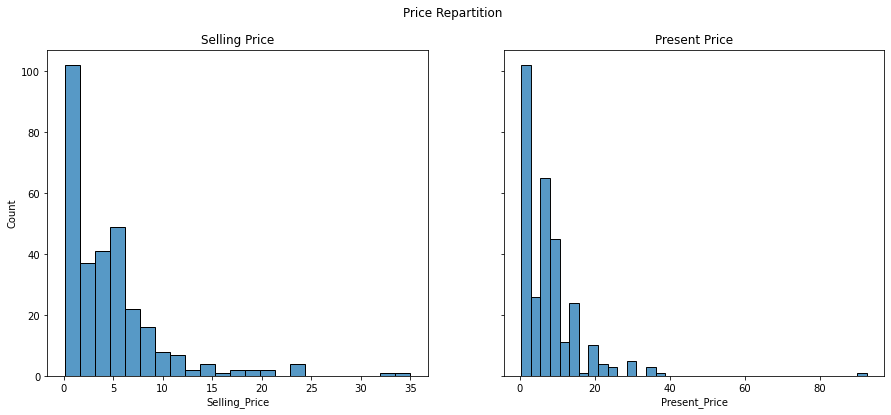

In [188]:
figure, axes = plt.subplots(1, 2, sharey=True, figsize=(15,6))
figure.suptitle("Price Repartition")
axes[0].set_title("Selling Price")
axes[1].set_title("Present Price")
sns.histplot(ax=axes[0], data=car_data["Selling_Price"])
sns.histplot(ax=axes[1], data=car_data["Present_Price"])

<AxesSubplot:ylabel='Selling_Price'>

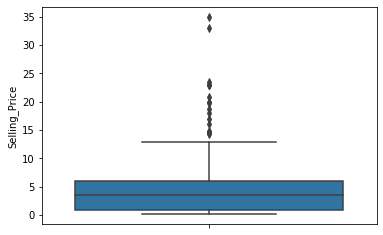

In [216]:
sns.boxplot(data=car_data, y="Selling_Price")

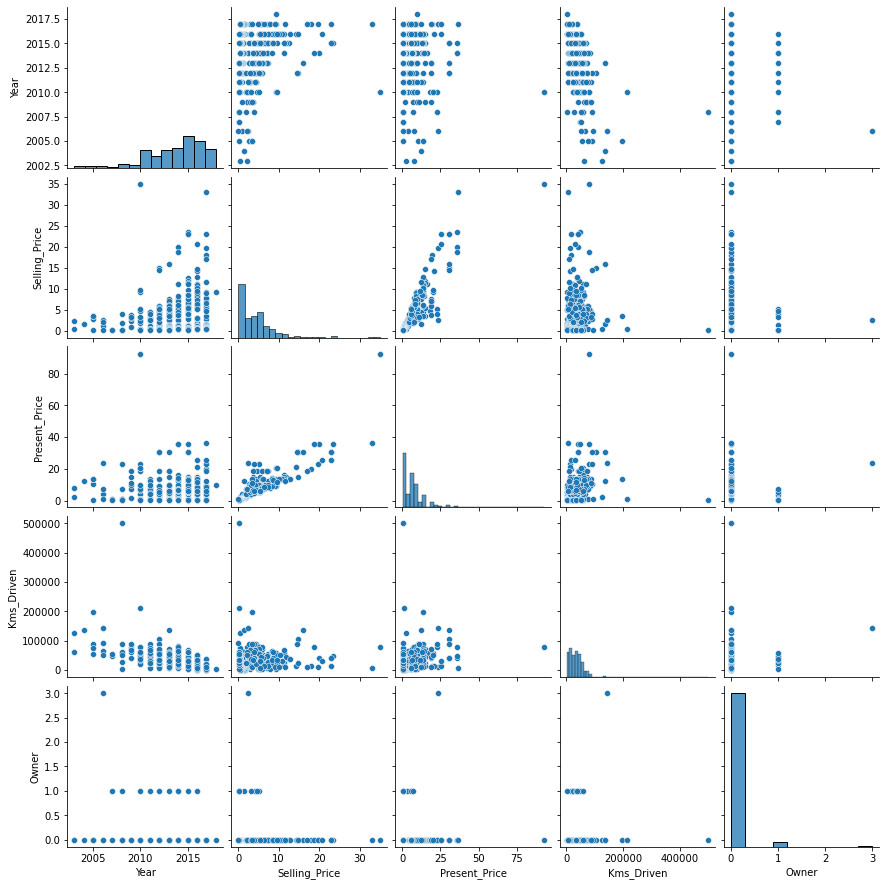

In [190]:
sns.pairplot(data=car_data)

### Data influence on selling price

We will be using catplots to analyse if some of the data have influence of the price of a car. Catplots are especialy usefull when we are trying to compare categorical values like for exemple here the fuel type or the transmission.

#### - Year

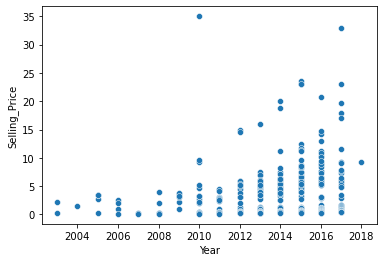

In [191]:
sns.scatterplot(x="Year", y="Selling_Price", data=car_data)
plt.show()

#### - Kms Driven

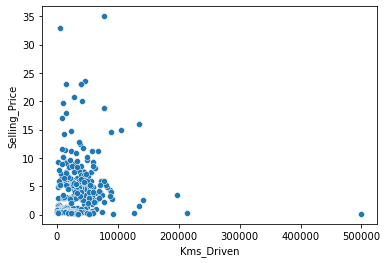

In [192]:
sns.scatterplot(x="Kms_Driven", y="Selling_Price", data=car_data)
plt.show()

#### - Fuel type

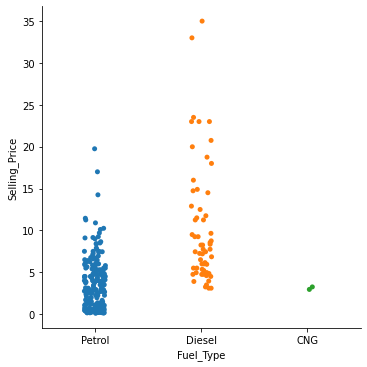

In [193]:
sns.catplot(x="Fuel_Type", y="Selling_Price", data=car_data)
plt.show()

#### - Transmission

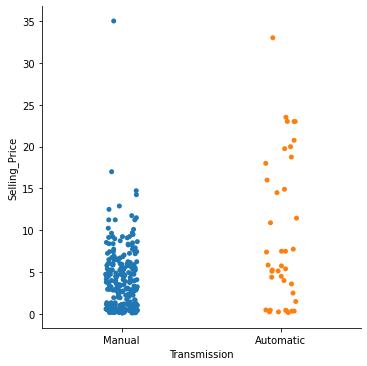

In [194]:
sns.catplot(x="Transmission", y="Selling_Price", data=car_data)
plt.show()

#### - Seller type

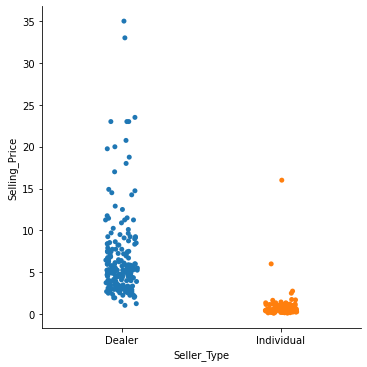

In [195]:
sns.catplot(x="Seller_Type", y="Selling_Price", data=car_data)
plt.show()

#### - Owner

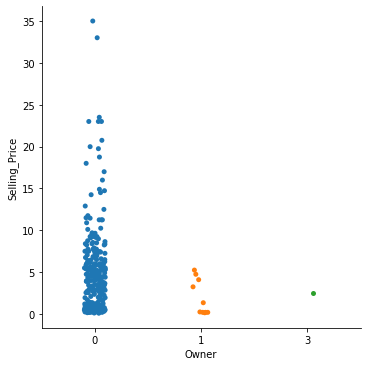

In [196]:
sns.catplot(x="Owner", y="Selling_Price", data=car_data)
plt.show()

It seems there could be a relation between the price of a car and its age. It looks like the older the car gets the cheaper it would cost. We will have to confirm that by doing a linear regression although the data are quite spreaded and that might have too great an impact on the regression score.

But first some of our values are way to high compared to others we need to do a normalization first in order to have a better understanding of how they affect one another.

### Normalization

In [197]:
car_data_normalized = car_data.copy()

for column in car_data_normalized.columns:
    if car_data_normalized[column].dtype != object and car_data_normalized[column].name != "Owner":
        car_data_normalized[column] = (car_data_normalized[column] - car_data_normalized[column].min()) / (car_data_normalized[column].max() - car_data_normalized[column].min())    
  
# view normalized data
print(car_data_normalized)

    Car_Name      Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  0.733333       0.093123       0.057109    0.053053    Petrol   
1        sx4  0.666667       0.133238       0.099913    0.085085    Diesel   
2       ciaz  0.933333       0.204871       0.103273    0.012813    Petrol   
3    wagon r  0.533333       0.078797       0.041504    0.009409    Petrol   
4      swift  0.733333       0.128940       0.070980    0.083984    Diesel   
..       ...       ...            ...            ...         ...       ...   
296     city  0.866667       0.269341       0.122237    0.067043    Diesel   
297     brio  0.800000       0.111748       0.060468    0.119119    Petrol   
298     city  0.400000       0.093123       0.115735    0.175043    Petrol   
299     city  0.933333       0.326648       0.131990    0.017017    Diesel   
300     brio  0.866667       0.148997       0.060468    0.009938    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Man

### Encoding

We might also want to encode some of our categorical features that show promissing results

In [198]:
transmission = car_data_normalized["Transmission"]
# Create the encoder
encoder = LabelEncoder()

# Fit the encoder to the Transmission column
encoder.fit(transmission)
# Encode the Transmission column
car_data_normalized["transmission_encoded"] = encoder.transform(transmission)

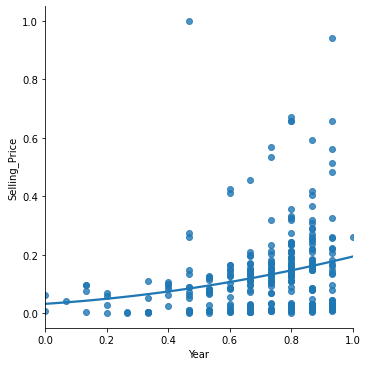

In [199]:
sns.lmplot(x ="Year", y ="Selling_Price", data = car_data_normalized, order = 2, ci = None)

This graph tends to suggest that there might be a linear correlation between the age of a car and its price, yet as said earlier the data are quite spreaded and that will impact the results

<AxesSubplot:>

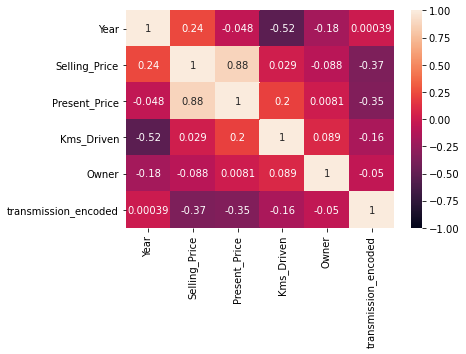

In [200]:
sns.heatmap(car_data_normalized.corr(), vmin=-1, vmax=1, annot=True)

In [219]:
# Eliminating NaN or missing input numbers
car_data_normalized.fillna(method ='ffill', inplace = True)

#Selecting the two variables
X_uni = car_data_normalized["Year"].values.reshape(-1, 1)
y_uni = car_data_normalized["Selling_Price"]

#Creating the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_uni, y_uni, test_size=0.8)

regr = LinearRegression()
  
regr.fit(X_train, y_train)
print("Regression score : ", regr.score(X_test, y_test))

Regression score :  0.019698381473471582


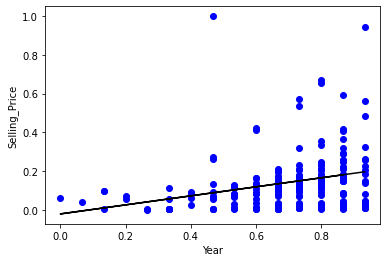

In [222]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.xlabel("Year")
plt.ylabel("Selling_Price")
plt.show()

The low score indicate that our data set, as it is, might be unfit for a linear regression. 

This could be interpreted by the fact that some cars that are considered as "Vintage" would gain value the older they gets but other types of car that are not so rare or special would juste loose value over time therefore messing with the relation between age and price of a car.

The other factor might be that other variables might have an impact on the price, such as the transmission, Kms driven or even the car itself (i.e some cars are just naturaly more expensive than others and the gap between those values might be interfering with the results)

In [213]:
#Selecting the two variables
X_multi = car_data_normalized[["Year", "Kms_Driven", "transmission_encoded"]]
y_multi = car_data_normalized["Selling_Price"]

#Creating the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.8)

regr = LinearRegression()
  
regr.fit(X_train, y_train)
print("Regression score : ", regr.score(X_test, y_test))

Regression score :  0.1631654633944215


In [214]:
y_pred = regr.predict(X_test)

# Calculate the evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f"R-squared: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

R-squared: 0.16
RMSE: 0.13
MAE: 0.09


In [205]:
car_data_normalized.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,transmission_encoded
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,0.708527,0.130696,0.079199,0.072967,0.043189,0.867110
std,0.192770,0.145639,0.093673,0.077852,0.247915,0.340021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.600000,0.022923,0.009536,0.029029,0.000000,1.000000
50%,0.733333,0.100287,0.065886,0.063063,0.000000,1.000000
75%,0.866667,0.169054,0.103814,0.096631,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


### Conclusion

We can see that our data set isn't really fit for a linear regression, results are too inconclusive.

This can be explained by different factors :

    - The data don't have a clear impact on the price :
        We can see that on most of the graph that we made the data is massively spread and therefore result
        are impacted  even if by looking at the Year/price graph we can see that there might be a relation
        it's to vague to be used.
      
    - Some cars are naturaly mor expensive than others :
        Some of the cars are just more expensive because they might have more features such as 
        bluetooth or roof window etc...
        Some just go faster and have more expensive parts ect ...
        This base price difference is one of the main reason the data are so spreaded and rendered unexploitable
        
    - The age effect on the price is inconsistant :
        As explained earlier some cars or brand of cars are considered as vintage, they might have been typical 
        during a certain period of time or famous because of a moovie etc...
        Therefore such cars will increase in value the older they gets whereas low cost cars will just loose value
        over time
        
        
There might be more factors that can explain those results but the conclusion is that those data as they are, are unfit for linear regression.